# In questo notebook disegno alcuni grafici che rappresentano la frequenza con cui gli utenti hanno pubblicato tweet

In [1]:
import pandas as pd

In [2]:
id_utenti = []
anni_correnti = []
tweet_totali = []
mesi = []
tweet_medi = []
to_delete = []

In [12]:
r = open('Pubblicazioni_annuali_pt4/part-00000', 'r')

In [13]:
for line in r:
    line = line.strip()
    id_utente_corrente, anno_corrente, tweet_totali_correnti, mese_corrente, tweet_medi_correnti = line.split(",")
    id_utenti.append(id_utente_corrente)
    anni_correnti.append(anno_corrente)
    tweet_totali.append(int(tweet_totali_correnti))
    mesi.append(mese_corrente)
    tweet_medi.append(int(tweet_medi_correnti))
    if anno_corrente != '2022':
        to_delete.append(id_utente_corrente)

In [14]:
r.close()

In [15]:
df = pd.DataFrame(list(zip(id_utenti, anni_correnti, tweet_totali, mesi, tweet_medi)), columns=['id_utente', 'anno', 'totale', 'mesi', 'media'])

In [16]:
new = df.sort_values(by='totale', ascending=False)

In [17]:
new.reset_index(inplace=True, drop=True)

<AxesSubplot:>

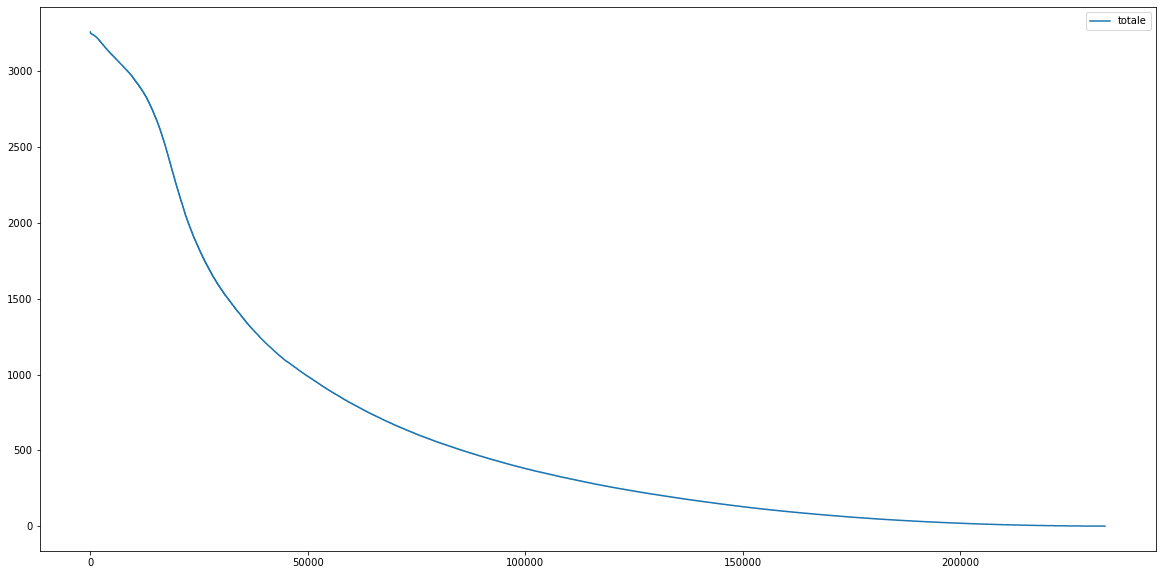

In [18]:
new.plot(y=['totale'], figsize=(20,10))

<AxesSubplot:>

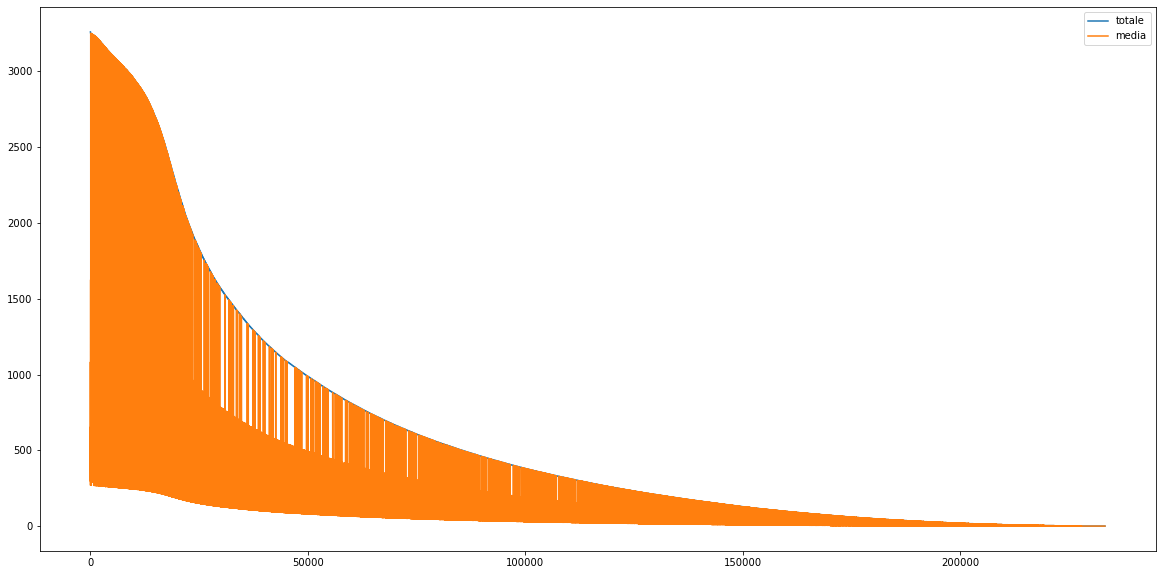

In [19]:
new.plot(figsize=(20,10))

<AxesSubplot:>

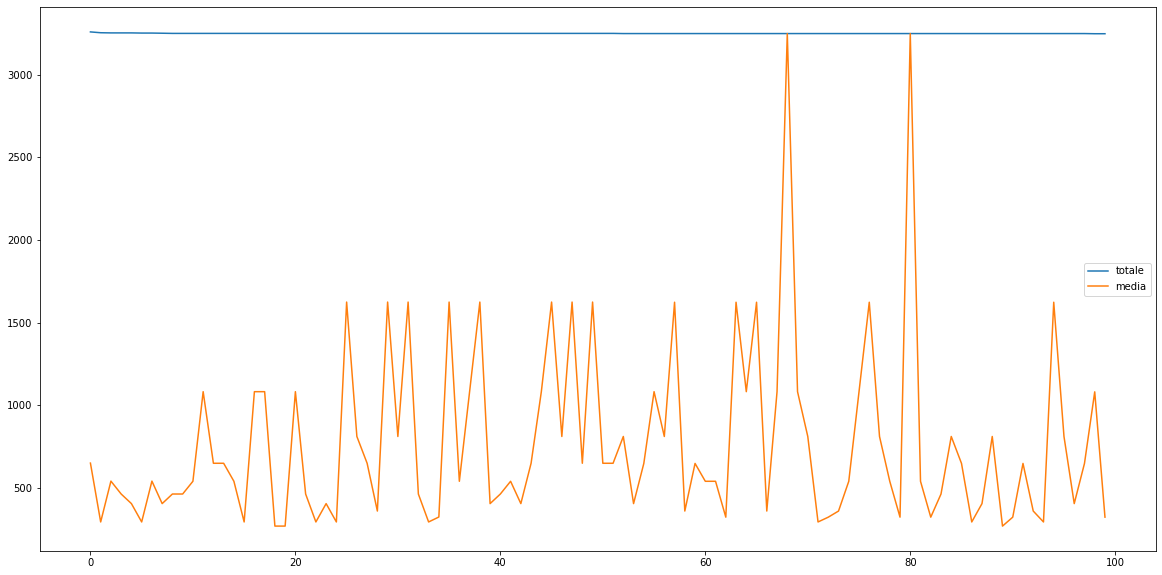

In [20]:
new.head(100).plot(figsize=(20,10))

In [1]:
#ometto il risultato in quanto appaiono gli id degli utenti, cosa che è contro la politica di Twitter
new

In [22]:
only2022 = df.loc[~df['id_utente'].isin(to_delete)]

In [2]:
#ometto il risultato in quanto appaiono gli id degli utenti, cosa che non è concessa in base alla politica di Twitter
only2022

In [24]:
new_only2022 = only2022.sort_values(by='totale', ascending=False)

In [25]:
new_only2022.reset_index(inplace=True, drop=True)

In [3]:
#ometto il risultato in quanto apparivano gli id degli utenti, cosa non consentita dalla politica di Twitter
new_only2022

<AxesSubplot:>

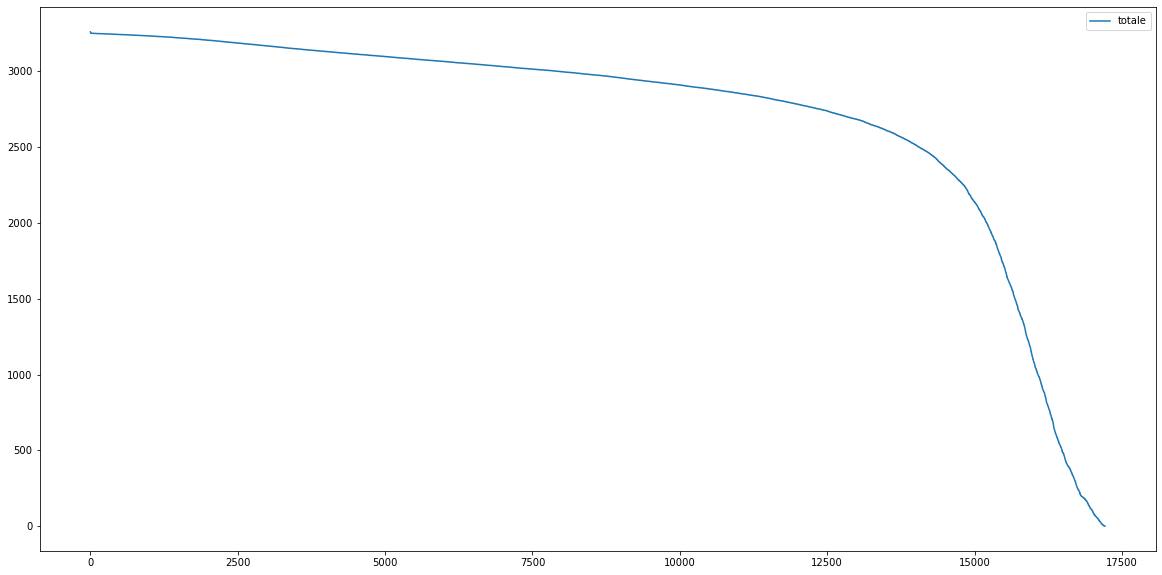

In [27]:
new_only2022.plot(y=['totale'], figsize=(20,10))

<AxesSubplot:>

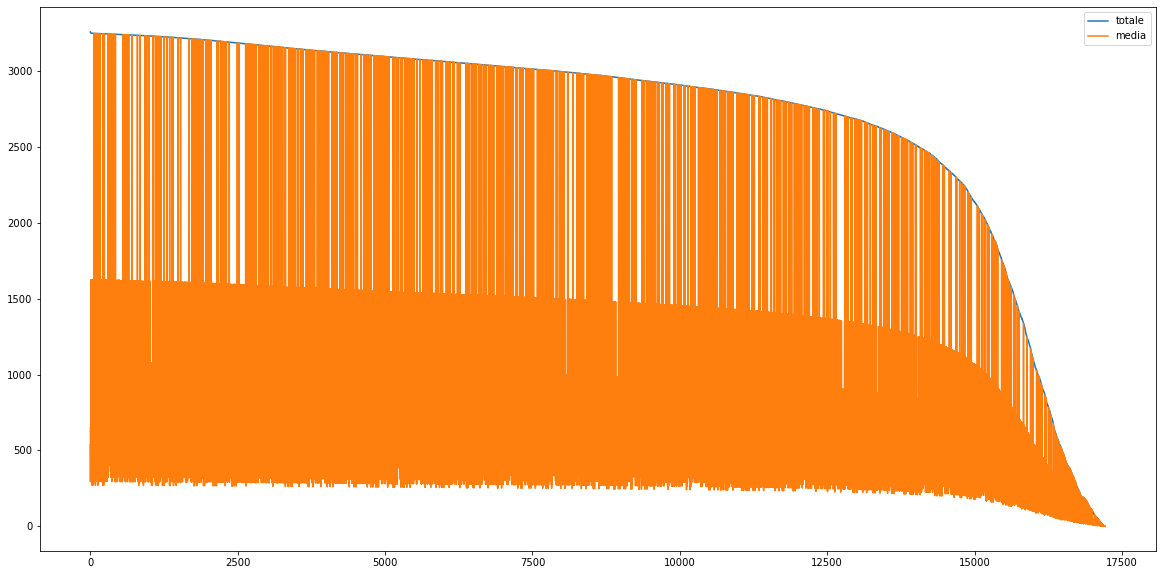

In [28]:
new_only2022.plot(figsize=(20,10))

In [29]:
media_del_totale_2022 = new_only2022['totale'].mean()

In [30]:
print(media_del_totale_2022)

2706.023411176949


In [31]:
media_della_media_2022 = new_only2022['media'].mean()

In [32]:
print(media_della_media_2022)

723.2313233414662


In [33]:
to_save = new_only2022[:12500]

In [34]:
user_list = to_save['id_utente'].tolist()

In [42]:
with open('lista_di_tutti_gli_utenti_interessanti.txt', 'w') as temp_file:
    for item in user_list:
        temp_file.write("%s\n" %item)

In [40]:
new_only2022.to_csv('utente_tweettotali.csv')